In [6]:
import math,os,glob,h5py
import numpy as np
import matplotlib.pyplot as plt

In [14]:
print("Loading data")
filepathDijets="../FlattenReweighted/MergedDijets.h5"
filepathHiggs="../FlattenReweighted/MergedHbb.h5"
filepathTop="../FlattenReweighted/MergedTop.h5"
loadDijets=h5py.File(filepathDijets,'r')
loadHiggs=h5py.File(filepathHiggs,'r')
loadTop=h5py.File(filepathTop,'r')
dijets=loadDijets.get("data")
hbb=loadHiggs.get("data")
top=loadTop.get("data")

print("Loading pt and eta")
#dijets=np.reshape(dijets,(dijets.shape[0],dijets.shape[1]))
#hbb=np.reshape(hbb,(hbb.shape[0],hbb.shape[1]))
#top=np.reshape(top,(top.shape[0],top.shape[1]))

#dijetspt=dijets[:,8:9]
#higgspt=hbb[:,8:9]
#topt=top[:,8:9]
#dijetseta=dijets[:,9:10]
#higgseta=hbb[:,9:10]
#topeta=top[:,9:10]

dijetspt=dijets[:,8]
higgspt=hbb[:,8]
topt=top[:,8]
dijetseta=dijets[:,9]
higgseta=hbb[:,9]
topeta=top[:,9]

dijetsweight=np.full((dijetspt.shape[0], 1), 1)
higgsweight=np.full((higgspt.shape[0], 1), 1)
topweight=np.full((topt.shape[0], 1), 1)

ptbins=np.linspace(0, 4000, 401)
etabins=np.linspace(-3.2, 3.2, 401)

print("Processing 1")
dijetshist,_,_= np.histogram2d(dijetseta, dijetspt,[etabins, ptbins])
higgshist,_,_ = np.histogram2d(higgseta,higgspt,[etabins, ptbins])
tophist,_,_ = np.histogram2d(topeta,topt,[etabins, ptbins])

dijets_locations_pt = np.digitize(dijetspt, ptbins) - 1
dijets_locations_eta = np.digitize(dijetseta, etabins) - 1
dijets_locations = zip(dijets_locations_pt, dijets_locations_eta)
dijets_locations = list(dijets_locations)

higgs_locations_pt = np.digitize(higgspt, ptbins) - 1
higgs_locations_eta = np.digitize(higgseta, etabins) - 1
higgs_locations = zip(higgs_locations_pt, higgs_locations_eta)
higgs_locations = list(higgs_locations)

top_locations_pt = np.digitize(topt, ptbins) - 1
top_locations_eta = np.digitize(topeta, etabins) - 1
top_locations = zip(top_locations_pt, top_locations_eta)
top_locations = list(top_locations)

print("Processing 2")
dijets_loc_indices = { (pti, etai) : [] for pti,_ in enumerate(ptbins[::-1]) for etai,_ in enumerate(etabins[::-1])}
higgs_loc_indices = { (pti, etai) : [] for pti,_ in enumerate(ptbins[::-1]) for etai,_ in enumerate(etabins[::-1])}
top_loc_indices = { (pti, etai) : [] for pti,_ in enumerate(ptbins[::-1]) for etai,_ in enumerate(etabins[::-1])}
for i, x in enumerate(dijets_locations):
        dijets_loc_indices[x].append(i)
for i, x in enumerate(higgs_locations):
        higgs_loc_indices[x].append(i)
for i, x in enumerate(top_locations):
        top_loc_indices[x].append(i)
dijets_indices = []
higgs_indices = []
top_indices = []

print("Processing 3")
for pt_bin_i in range(len(ptbins) - 1):
        for eta_bin_i in range(len(etabins) - 1):
            loc = (pt_bin_i, eta_bin_i)
            ndijets = int(dijetshist[eta_bin_i][pt_bin_i])
            nhiggs = int(higgshist[eta_bin_i][pt_bin_i])
            ntop = int(tophist[eta_bin_i][pt_bin_i])
            njets = min([ndijets, nhiggs, ntop])
            dijets_indices_for_bin = dijets_loc_indices[loc][0:njets]
            higgs_indices_for_bin = higgs_loc_indices[loc][0:njets]
            top_indices_for_bin = top_loc_indices[loc][0:njets]
            dijets_indices += dijets_indices_for_bin
            higgs_indices += higgs_indices_for_bin
            top_indices += top_indices_for_bin

dijets_indices.sort()
higgs_indices.sort()
top_indices.sort()
print(np.array(dijets_indices), np.array(higgs_indices), np.array(top_indices))

Loading data
Loading pt and eta
Processing 1
Processing 2
Processing 3
[      0       1       2 ... 5978387 5978393 5978397] [      0       1       2 ... 3396316 3396339 3396340] [      0       1       2 ... 3265783 3265785 3265786]


(2468413, 23)


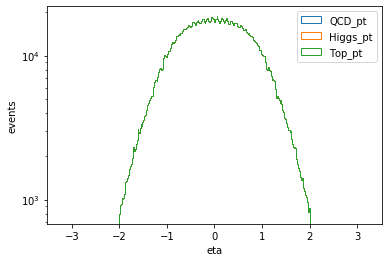

<Figure size 432x288 with 0 Axes>

In [33]:
plt.figure()
Dijets=np.take(dijets, dijets_indices,axis=0)
Higgs=np.take(hbb, higgs_indices,axis=0)
Top=np.take(top, top_indices,axis=0)
print(Dijets.shape)
plt.hist(Dijets[:,9],weights=np.full((Dijets.shape[0], ), 1),bins=etabins,label="QCD_pt",histtype="step")
plt.hist(Higgs[:,9],weights=np.full((Higgs.shape[0], ), 1),bins=etabins,label="Higgs_pt",histtype="step")
plt.hist(Top[:,9],weights=np.full((Top.shape[0], ), 1),bins=etabins,label="Top_pt",histtype="step")
#plt.plot(np.linspace(0, 4000, 400),minjets,label="minjets")
plt.xlabel('eta')
plt.ylabel('events')
plt.yscale("log", nonposy="clip")
plt.legend(loc='best')
plt.show()
name="figures/"+"eta.pdf"
plt.savefig(name)

In [32]:
finaldijets=Dijets
print( finaldijets.shape)
savedijets = h5py.File("../FlattenResample/MergedDijets.h5", 'w')
savedijets.create_dataset("data",data=finaldijets)
savedijets.close()

finaltop=Top
print( finaltop.shape)
savetop = h5py.File("../FlattenResample/MergedTop.h5", 'w')
savetop.create_dataset("data",data=finaltop)
savetop.close()

finalhbb=Higgs
print( finalhbb.shape)
savehbb = h5py.File("../FlattenResample/MergedHbb.h5", 'w')
savehbb.create_dataset("data",data=finalhbb)
savehbb.close()

(2468413, 23)
(2468413, 23)
(2468413, 23)


In [ ]:
filepathDijets="../FlattenReweighted/MergedDijets.h5"
filepathHiggs="../FlattenReweighted/MergedHbb.h5"
filepathTop="../FlattenReweighted/MergedTop.h5"
loadDijets=h5py.File(filepathDijets,'r')
loadHiggs=h5py.File(filepathHiggs,'r')
loadTop=h5py.File(filepathTop,'r')
dijets=loadDijets.get("data")
hbb=loadHiggs.get("data")
top=loadTop.get("data")
print(dijets.shape)
print("1")

dijets=np.reshape(dijets,(dijets.shape[0],dijets.shape[1]))
hbb=np.reshape(hbb,(hbb.shape[0],hbb.shape[1]))
top=np.reshape(top,(top.shape[0],top.shape[1]))
print("2")

dijetspt=dijets[:,8:9]
higgspt=hbb[:,8:9]
topt=top[:,8:9]
dijetseta=dijets[:,9:10]
higgseta=hbb[:,9:10]
topeta=top[:,9:10]

dijetsweight=np.full((dijetspt.shape[0], 1), 1)
higgsweight=np.full((higgspt.shape[0], 1), 1)
topweight=np.full((topt.shape[0], 1), 1)

ptbins=np.linspace(0, 4000, 401)
etabins=np.linspace(-3.2, 3.2, 401)


dijetshist,binedge=np.histogram(dijetspt, bins, weights=dijetsweight)#[0]
higgshist=np.histogram(higgspt, bins, weights=higgsweight)[0]
tophist=np.histogram(topt, bins, weights=topweight)[0]

dijetsindice=np.array(list(np.digitize(dijetspt,bins)-1))
higgsindice=np.array(list(np.digitize(higgspt,bins)-1))
topindice=np.array(list(np.digitize(topt,bins)-1))

dijetsindicept=np.column_stack((dijetsindice,dijetspt,dijets))
higgsindicept=np.column_stack((higgsindice,higgspt,hbb))
topindicept=np.column_stack((topindice,topt,top))

jetcounts=np.column_stack((dijetshist,higgshist,tophist))
minjets=np.amin(jetcounts,axis=1)
print("3")

for ibin, njets in enumerate(minjets):
    #print ibin,njets,dijetshist[ibin],higgshist[ibin],tophist[ibin]
    if njets!=0: # and ibin<=30:
        if ibin==25:
            redijets=dijetsindicept[dijetsindicept[:,0]==ibin][0:njets]
            rehiggs=higgsindicept[higgsindicept[:,0]==ibin][0:njets]
            retop=topindicept[topindicept[:,0]==ibin][0:njets]
        else:
            redijets=np.vstack((redijets,dijetsindicept[dijetsindicept[:,0]==ibin][0:njets]))
            rehiggs=np.vstack((rehiggs,higgsindicept[higgsindicept[:,0]==ibin][0:njets]))
            retop=np.vstack((retop,topindicept[topindicept[:,0]==ibin][0:njets]))
print( "4")
            
plt.hist(redijets[:,1],weights=np.full((redijets.shape[0], ), 1),bins=bins,label="QCD_pt",histtype="step")
plt.hist(rehiggs[:,1],weights=np.full((rehiggs.shape[0], ), 1),bins=bins,label="Higgs_pt",histtype="step")
plt.hist(retop[:,1],weights=np.full((retop.shape[0], ), 1),bins=bins,label="Top_pt",histtype="step")
plt.plot(np.linspace(0, 4000, 400),minjets,label="minjets")
plt.xlabel('pt')
plt.ylabel('events')
plt.yscale("log", nonposy="clip")
plt.legend(loc='best')
plt.show()
print( "5")

finaldijets=redijets[:,2:]
print( finaldijets.shape)
savedijets = h5py.File("../FlattenResample/MergedDijets.h5", 'w')
savedijets.create_dataset("data",data=finaldijets)
savedijets.close()

finaltop=retop[:,2:]
print( finaltop.shape)
savetop = h5py.File("../FlattenResample/MergedTop.h5", 'w')
savetop.create_dataset("data",data=finaltop)
savetop.close()

finalhbb=rehiggs[:,2:]
print( finalhbb.shape)
savehbb = h5py.File("../FlattenResample/MergedHbb.h5", 'w')
savehbb.create_dataset("data",data=finalhbb)
savehbb.close()

print( "6")




(5978412, 23)
1
2
3


1 (2801861, 102) (2810476, 102)
2
3


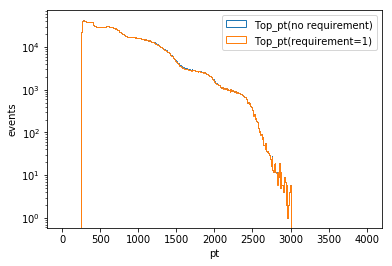

In [16]:
filepathDijets="/global/project/projectdirs/atlas/massDecorrelatedXbb/Xbb0106/DataVRGhost/FlattenResample/MergedTop.h5"
filepathHiggs="/global/project/projectdirs/atlas/massDecorrelatedXbb/Xbb0106/DataVRGhost/FlattenResample/MergedHbb.h5"
filepathTop="/global/project/projectdirs/atlas/massDecorrelatedXbb/Xbb0106/DataVRGhost/FlattenResample/MergedTop.h5"
loadDijets=h5py.File(filepathDijets,'r')
loadHiggs=h5py.File(filepathHiggs,'r')
loadTop=h5py.File(filepathTop,'r')

dijets=loadDijets.get("data")
hbb=loadHiggs.get("data")
top=loadTop.get("data")
print "1",top.shape,dijets.shape

dijets=np.reshape(dijets,(dijets.shape[0],dijets.shape[1]))
hbb=np.reshape(hbb,(hbb.shape[0],hbb.shape[1]))
top=np.reshape(top,(top.shape[0],top.shape[1]))
print "2"

dijetspt=dijets[:,5:6]
higgspt=hbb[:,5:6]
topt=top[:,5:6]
dijetsweight=np.full((dijetspt.shape[0], 1), 1)
higgsweight=np.full((higgspt.shape[0], 1), 1)
topweight=np.full((topt.shape[0], 1), 1)
print "3"

bins=np.linspace(0, 4000, 401)
plt.hist(dijetspt,weights=dijetsweight,bins=bins,label="Top_pt(no requirement)",histtype="step")
#plt.hist(higgspt,weights=higgsweight,bins=bins,label="Higgs_pt",histtype="step")
plt.hist(topt,weights=topweight,bins=bins,label="Top_pt(requirement=1)",histtype="step")
plt.xlabel('pt')
plt.ylabel('events')
plt.yscale("log", nonposy="clip")
plt.legend(loc='best')
pt_file="figures/"+"pt_ghost_top.pdf"
pt_file1=pt_file.replace("pdf","jpg")
plt.savefig(pt_file)

plt.show()

1 (3265788, 23)
3


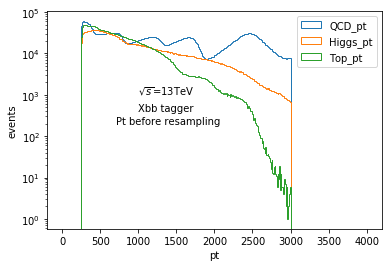

In [9]:
filepathDijets="/global/project/projectdirs/atlas/massDecorrelatedXbb/Xbb0106/DataVRGhost/FlattenReweighted/MergedDijets.h5"
filepathHiggs="/global/project/projectdirs/atlas/massDecorrelatedXbb/Xbb0106/DataVRGhost/FlattenReweighted/MergedHbb.h5"
filepathTop="/global/project/projectdirs/atlas/massDecorrelatedXbb/Xbb0106/DataVRGhost/FlattenReweighted/MergedTop.h5"
loadDijets=h5py.File(filepathDijets,'r')
loadHiggs=h5py.File(filepathHiggs,'r')
loadTop=h5py.File(filepathTop,'r')

dijets=loadDijets.get("data")
hbb=loadHiggs.get("data")
top=loadTop.get("data")
print "1",top.shape

dijets=np.reshape(dijets,(dijets.shape[0],dijets.shape[1]))
hbb=np.reshape(hbb,(hbb.shape[0],hbb.shape[1]))
top=np.reshape(top,(top.shape[0],top.shape[1]))

dijetspt=dijets[:,8:9]
higgspt=hbb[:,8:9]
topt=top[:,8:9]
dijetsweight=np.full((dijetspt.shape[0], 1), 1)
higgsweight=np.full((higgspt.shape[0], 1), 1)
topweight=np.full((topt.shape[0], 1), 1)
print "3"

bins=np.linspace(0, 4000, 401)
plt.hist(dijetspt,weights=dijetsweight,bins=bins,label="QCD_pt",histtype="step")
plt.hist(higgspt,weights=higgsweight,bins=bins,label="Higgs_pt",histtype="step")
plt.hist(topt,weights=topweight,bins=bins,label="Top_pt",histtype="step")
#plt.hist(dijetspt,weights=dijets[:,0],bins=bins,label="QCD_pt",histtype="step")
#plt.hist(higgspt,weights=hbb[:,0],bins=bins,label="Higgs_pt",histtype="step")
#plt.hist(topt,weights=top[:,0],bins=bins,label="Top_pt",histtype="step")
plt.xlabel('pt')
plt.ylabel('events')
plt.yscale("log", nonposy="clip")
plt.legend(loc='best')
plt.text(1000,1e3*1,r'$\sqrt{s}$=13TeV')
plt.text(1000,1e3*0.4,r'Xbb tagger')
plt.text(700,1e3*0.2,r'Pt before resampling')
pt_file="figures/"+"pt_beforeResample.pdf"
pt_file1=pt_file.replace("pdf","jpg")
plt.savefig(pt_file)
plt.savefig(pt_file1)
plt.show()

In [7]:
a=['reweight','weight','eventNumber','dsid','mass','pt','eta','Split12', 'Split23', 'Qw','PlanarFlow', 'Angularity', 'Aplanarity', 'ZCut12', 'KtDR', 'C2', 'D2', 'e3', 'Tau21_wta', 'Tau32_wta', 'FoxWolfram20','vr_dl1r_pb_1', 'vr_dl1r_pc_1', 'vr_dl1r_pu_1', 'vr_dl1r_pb_2', 'vr_dl1r_pc_2', 'vr_dl1r_pu_2', 'vr_dl1r_pb_3', 'vr_dl1r_pc_3', 'vr_dl1r_pu_3','JetFitter_N2Tpair_1', 'JetFitter_dRFlightDir_1', 'JetFitter_deltaeta_1', 'JetFitter_deltaphi_1', 'JetFitter_energyFraction_1', 'JetFitter_mass_1', 'JetFitter_massUncorr_1', 'JetFitter_nSingleTracks_1', 'JetFitter_nTracksAtVtx_1', 'JetFitter_nVTX_1', 'JetFitter_significance3d_1','SV1_L3d_1', 'SV1_Lxy_1', 'SV1_N2Tpair_1', 'SV1_NGTinSvx_1', 'SV1_deltaR_1', 'SV1_dstToMatLay_1', 'SV1_efracsvx_1', 'SV1_masssvx_1', 'SV1_significance3d_1', 'iprnn_pu_1', 'iprnn_pc_1', 'iprnn_pb_1', 'JetFitter_N2Tpair_2', 'JetFitter_dRFlightDir_2', 'JetFitter_deltaeta_2', 'JetFitter_deltaphi_2', 'JetFitter_energyFraction_2', 'JetFitter_mass_2', 'JetFitter_massUncorr_2', 'JetFitter_nSingleTracks_2', 'JetFitter_nTracksAtVtx_2', 'JetFitter_nVTX_2', 'JetFitter_significance3d_2', 'SV1_L3d_2', 'SV1_Lxy_2', 'SV1_N2Tpair_2', 'SV1_NGTinSvx_2', 'SV1_deltaR_2', 'SV1_dstToMatLay_2', 'SV1_efracsvx_2', 'SV1_masssvx_2', 'SV1_significance3d_2', 'iprnn_pu_2', 'iprnn_pc_2', 'iprnn_pb_2', 'JetFitter_N2Tpair_3', 'JetFitter_dRFlightDir_3', 'JetFitter_deltaeta_3', 'JetFitter_deltaphi_3', 'JetFitter_energyFraction_3', 'JetFitter_mass_3', 'JetFitter_massUncorr_3', 'JetFitter_nSingleTracks_3', 'JetFitter_nTracksAtVtx_3', 'JetFitter_nVTX_3', 'JetFitter_significance3d_3', 'SV1_L3d_3', 'SV1_Lxy_3', 'SV1_N2Tpair_3', 'SV1_NGTinSvx_3', 'SV1_deltaR_3', 'SV1_dstToMatLay_3', 'SV1_efracsvx_3', 'SV1_masssvx_3', 'SV1_significance3d_3', 'iprnn_pu_3', 'iprnn_pc_3', 'iprnn_pb_3', 'rnnip_pu_1', 'rnnip_pc_1', 'rnnip_pb_1', 'rnnip_ptau_1', 'rnnip_pu_2', 'rnnip_pc_2', 'rnnip_pb_2', 'rnnip_ptau_2', 'rnnip_pu_3', 'rnnip_pc_3', 'rnnip_pb_3', 'rnnip_ptau_3']

In [20]:
len(a)
c=3269286.0
d=3619158.0
(d-c)/d

0.09667220939235037